Access link:  https://bit.ly/46lnYOy

# 📊 EDA Analysis 

## What You Will Learn:

• **EDA Analysis**: Explore heart disease data patterns through comprehensive visualizations and statistical analysis



# About the Dataset and Column Description

This is a multivariate dataset commonly used in medical machine learning research to predict and analyze heart disease presence. Although the original database has 76 attributes, most published studies use a subset of 14 key attributes.

The main tasks for this dataset are:

**Prediction** – Determine whether a patient has heart disease based on their attributes.

**Diagnosis & Insights** – Explore correlations between patient features and heart disease risk.

**Column Description:**
* **`1.id`** (Unique id for each patient)
* **`2.age`** (Age of the patient in years)
* **`3.origin`** (place of study)
* **`4.sex`** (Male/Female)
* **`5.cp`** chest pain type
  1. typical angina,
  2. atypical angina,
  3. non-anginal,
  4. asymptomatic
* **`6.trestbps`** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* **`7.chol`** (serum cholesterol in mg/dl)
* **`8.fbs`** (if fasting blood sugar > 120 mg/dl)
* **`9.restecg`** (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* **`10.thalach`**: maximum heart rate achieved
* **`11.exang`**: exercise-induced angina (True/ False)
* **`12.oldpeak`**: ST depression induced by exercise relative to rest
* **`13.slope`**: the slope of the peak exercise ST segment
* **`14.ca`**: number of major vessels (0-3) colored by fluoroscopy
* **`15.thal`**: [normal; fixed defect; reversible defect]
* **`16.num`**: the predicted attribute

  0. no heart disease
  1. mild heart disease
  2. moderate heart disease
  3. severe heart disease
  4. critical heart disease

## 1. Importing Libraries

In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
import pandas as pd, kagglehub, glob

warnings.filterwarnings("error", category=FutureWarning)
warnings.filterwarnings('ignore')

!pip install shap



/home/subhashnerella/.local/share/conda/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Human-readable column name mappings for plots
COLUMN_LABELS = {
    'age': 'Age (years)',
    'sex': 'Gender',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure (mm Hg)',
    'chol': 'Cholesterol (mg/dl)',
    'fbs': 'Fasting Blood Sugar > 120 mg/dl',
    'restecg': 'Resting ECG Results',
    'thalch': 'Maximum Heart Rate',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression',
    'slope': 'Peak Exercise ST Slope',
    'ca': 'Major Vessels (0-3)',
    'thal': 'Thalassemia Type',
    'num': 'Heart Disease Level',
    'target': 'Heart Disease Status (Binary)',
    'binary_num': 'Heart Disease Status',
    'TSNE Component 1': 't-SNE Component 1',
    'TSNE Component 2': 't-SNE Component 2'
}

# Consistent color palette for all plots (except SHAP and t-SNE)
PLOT_COLORS = {
    'primary': '#2E4057',      # Dark blue-gray (main single plots)
    'secondary': '#048A81',    # Teal (secondary elements)
    'accent': '#F39C12',       # Orange (highlights/accents)
    'gender_male': '#2E4057',  # Dark blue-gray for male
    'gender_female': '#F39C12', # Orange for female
    'categorical': ['#2E4057', '#048A81', '#F39C12', '#E74C3C', '#9B59B6', '#27AE60'],  # For multiple categories
    'binary': ['#2E4057', '#048A81'],  # For binary classifications
    'gradient': ['#E8F4FD', '#2E4057'],  # Light to dark gradient
    'heatmap': 'RdYlBu_r'      # For heatmaps
}

## 2. Loading Data

In [ ]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
csv = glob.glob(f"{path}/*.csv")[0]
df = pd.read_csv(csv)

# Remove the 'dataset' column
df = df.drop('dataset', axis=1)
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## 3. Let's Explore the Age Column

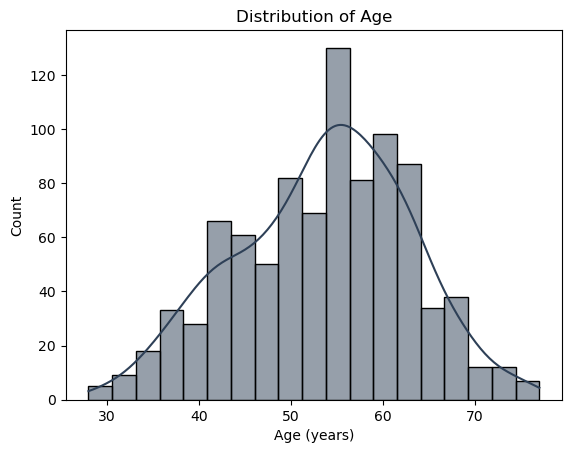

In [ ]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True, color=PLOT_COLORS['primary'])
plt.xlabel(COLUMN_LABELS['age'])
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

## 4. Let's Explore the Gender Column

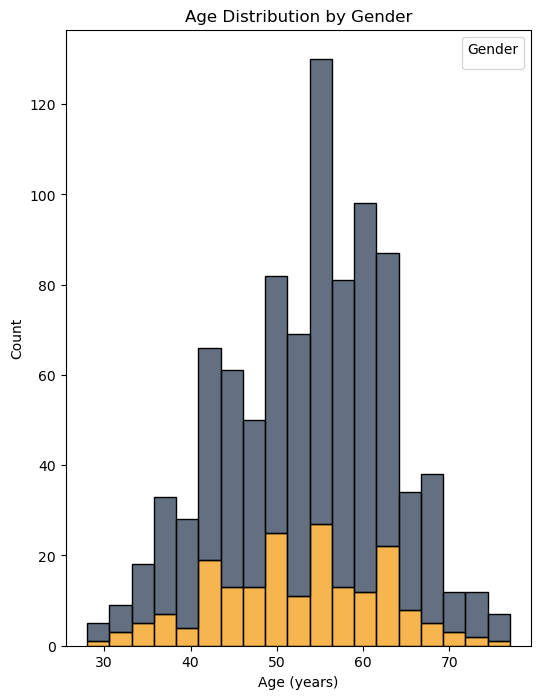

In [ ]:
plt.figure(figsize=(6, 8))
sns.histplot(data=df, x="age", hue="sex", multiple="stack",
             palette={'Male': PLOT_COLORS['gender_male'], 'Female': PLOT_COLORS['gender_female']})
plt.xlabel(COLUMN_LABELS['age'])
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
# Update legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title=COLUMN_LABELS['sex'])
plt.show()

In [ ]:
print(df['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


## 5. Exploring the Chest Pain Type Column

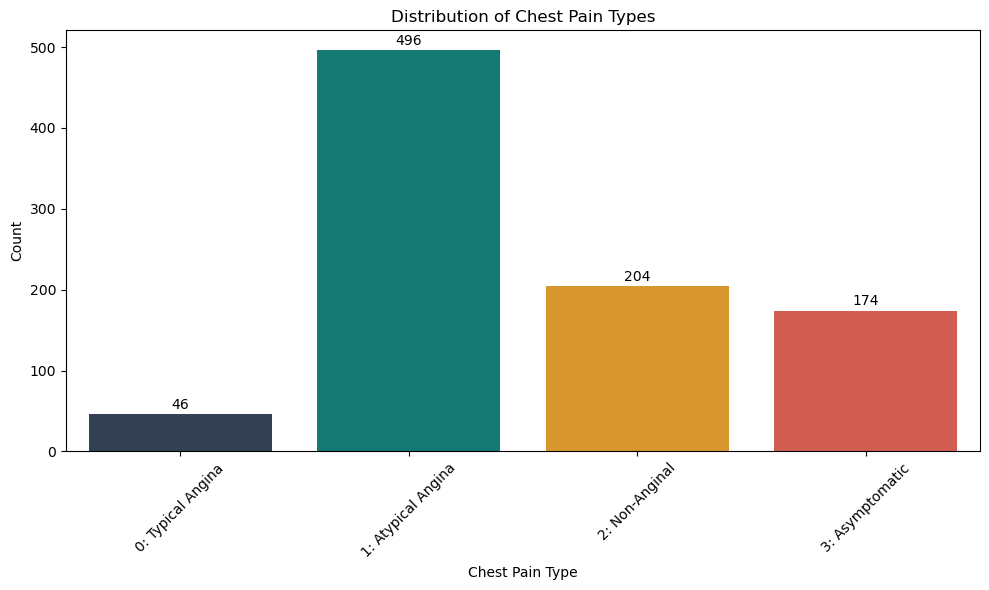

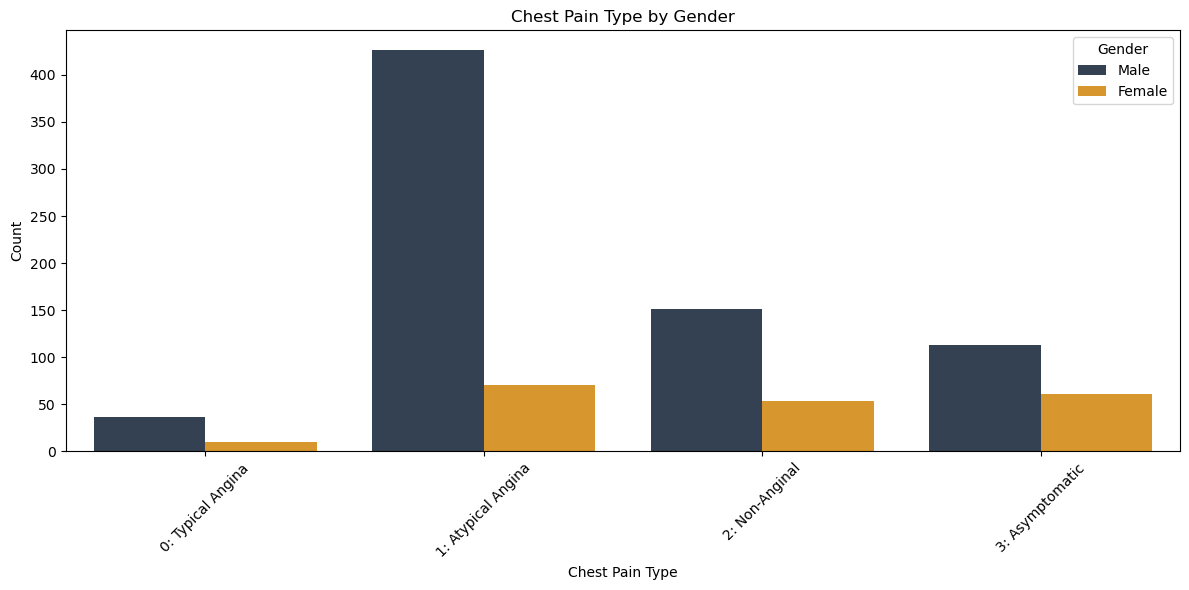

In [ ]:
# Chest pain type analysis with descriptive labels
chest_pain_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal', 3: 'Asymptomatic'}

# Univariate analysis of 'cp' (chest pain type)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', palette=PLOT_COLORS['categorical'])
plt.title('Distribution of Chest Pain Types')
plt.xlabel(COLUMN_LABELS['cp'])
plt.ylabel('Count')
# Add value labels on bars
ax = plt.gca()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, f'{int(height)}',
            ha='center', va='bottom')
# Update x-axis labels with descriptions
plt.xticks(range(4), [f'{i}: {chest_pain_labels[i]}' for i in range(4)], rotation=45)
plt.tight_layout()
plt.show()

# Bivariate analysis: Chest pain type vs Sex
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cp', hue='sex',
              palette={'Male': PLOT_COLORS['gender_male'], 'Female': PLOT_COLORS['gender_female']})
plt.title('Chest Pain Type by Gender')
plt.xlabel(COLUMN_LABELS['cp'])
plt.ylabel('Count')
plt.legend(title=COLUMN_LABELS['sex'])
# Update x-axis labels with descriptions
plt.xticks(range(4), [f'{i}: {chest_pain_labels[i]}' for i in range(4)], rotation=45)
plt.tight_layout()
plt.show()

## 6. Exploring the Resting Blood Pressure Column

Minimum value of trestbps is: 0.0
Miximum value of trestbps is: 200.0


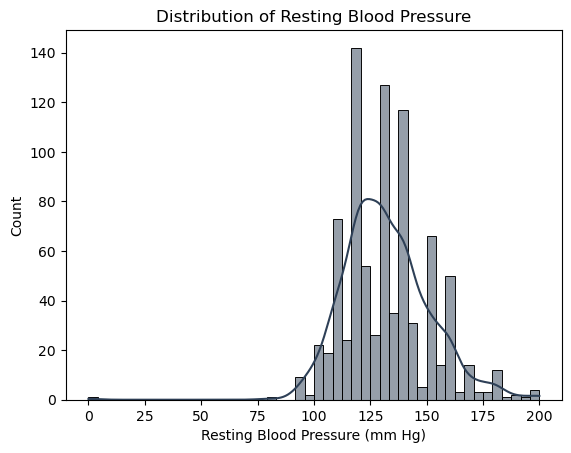

In [ ]:
min_t=df['trestbps'].min()
max_t=df['trestbps'].max()
print("Minimum value of trestbps is:",min_t)
print("Miximum value of trestbps is:",max_t)

sns.histplot(df['trestbps'], kde=True, color=PLOT_COLORS['primary'])
plt.xlabel(COLUMN_LABELS['trestbps'])
plt.ylabel('Count')
plt.title('Distribution of Resting Blood Pressure')
plt.show()

## 7. Exploring the Cholesterol Column

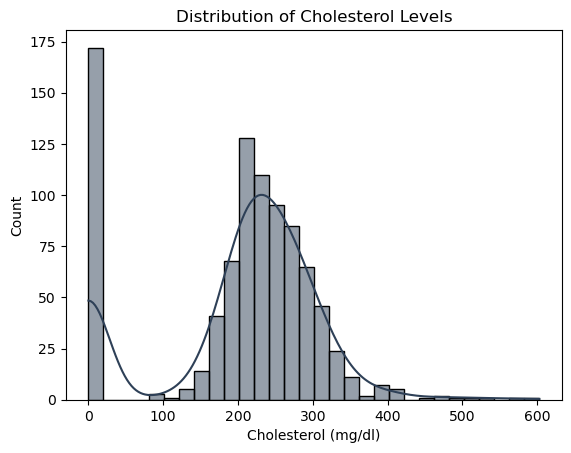

In [ ]:
sns.histplot(df['chol'], kde=True, bins=30, color=PLOT_COLORS['primary'])
plt.title('Distribution of Cholesterol Levels')
plt.xlabel(COLUMN_LABELS['chol'])
plt.ylabel('Count')
plt.show()

## 8. Exploring the Fasting Blood Sugar Column (if fbs > 120 mg/dl)

In [ ]:
df['fbs'] = df['fbs'].astype(bool)
print(df['fbs'].value_counts())

fbs
False    692
True     228
Name: count, dtype: int64


## 9. Exploring the Resting ECG Column

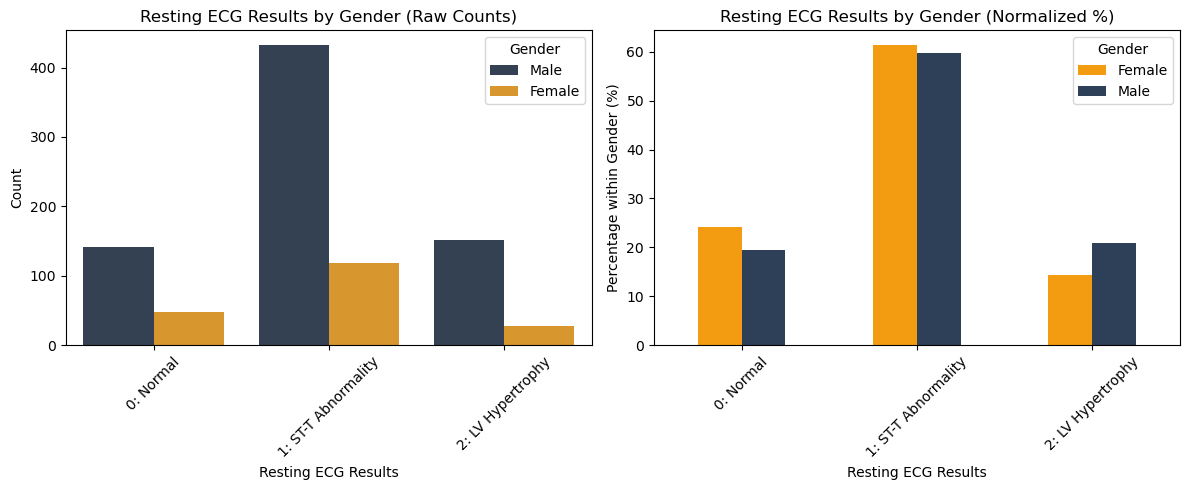

Gender distribution in dataset:
sex
Male      726
Female    194
Name: count, dtype: int64

Gender proportions: sex
Male      0.789
Female    0.211
Name: proportion, dtype: float64

Total patients: 920


In [ ]:
# ECG labels for better readability
ecg_labels = {0: 'Normal', 1: 'ST-T Abnormality', 2: 'LV Hypertrophy'}

# Raw counts by gender
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='restecg', hue='sex',
              palette={'Male': PLOT_COLORS['gender_male'], 'Female': PLOT_COLORS['gender_female']})
plt.xlabel(COLUMN_LABELS['restecg'])
plt.ylabel('Count')
plt.title('Resting ECG Results by Gender (Raw Counts)')
plt.legend(title=COLUMN_LABELS['sex'])
plt.xticks(range(3), [f'{i}: {ecg_labels[i]}' for i in range(3)], rotation=45)

# Normalized proportions by gender
plt.subplot(1, 2, 2)
# Calculate proportions within each gender
ecg_gender_props = df.groupby(['restecg', 'sex']).size().unstack(fill_value=0)
ecg_gender_props_norm = ecg_gender_props.div(ecg_gender_props.sum(axis=0), axis=1) * 100

ecg_gender_props_norm.plot(kind='bar', ax=plt.gca(),
                          color=[PLOT_COLORS['gender_female'], PLOT_COLORS['gender_male']])
plt.xlabel(COLUMN_LABELS['restecg'])
plt.ylabel('Percentage within Gender (%)')
plt.title('Resting ECG Results by Gender (Normalized %)')
plt.legend(title=COLUMN_LABELS['sex'])
plt.xticks(range(3), [f'{i}: {ecg_labels[i]}' for i in range(3)], rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Gender distribution in dataset:")
print(df['sex'].value_counts())
print(f"\nGender proportions: {df['sex'].value_counts(normalize=True).round(3)}")
print(f"\nTotal patients: {len(df)}")

## 10. Exploring Maximum Heart Rate Achieved

1. Range and Distribution:
thalch ranges from 60.0 to 202.0 (excluding NaNs).
Mean thalch: 137.55, Median thalch: 140.00

2. Correlation with Age:
Correlation between thalch and age: -0.37 (typically negative, as max heart rate decreases with age)


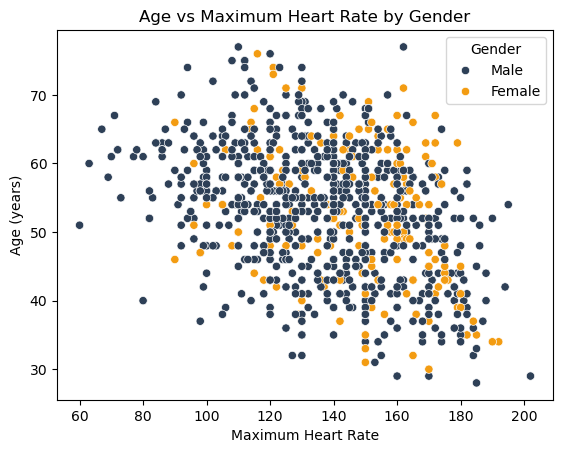

In [ ]:
print("1. Range and Distribution:")
print(f"thalch ranges from {df['thalch'].min()} to {df['thalch'].max()} (excluding NaNs).")
print(f"Mean thalch: {df['thalch'].mean():.2f}, Median thalch: {df['thalch'].median():.2f}")

print("\n2. Correlation with Age:")
thalch_age_corr = df[['thalch', 'age']].corr().loc['thalch', 'age']
print(f"Correlation between thalch and age: {thalch_age_corr:.2f} (typically negative, as max heart rate decreases with age)")

sns.scatterplot(data=df, x='thalch', y='age', hue='sex',
                palette={'Male': PLOT_COLORS['gender_male'], 'Female': PLOT_COLORS['gender_female']})
plt.xlabel(COLUMN_LABELS['thalch'])
plt.ylabel(COLUMN_LABELS['age'])
plt.title('Age vs Maximum Heart Rate by Gender')
plt.legend(title=COLUMN_LABELS['sex'])
plt.show()

## 11. Exploring Exercise-Induced Angina

In [ ]:
print(df['exang'].value_counts())

exang
False    528
True     337
Name: count, dtype: int64


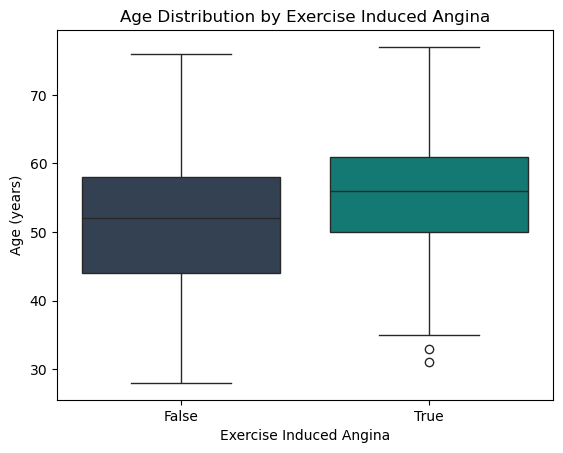

In [ ]:
sns.boxplot(data=df, x='exang', y='age', palette=PLOT_COLORS['categorical'][:2])
plt.title('Age Distribution by Exercise Induced Angina')
plt.xlabel(COLUMN_LABELS['exang'])
plt.ylabel(COLUMN_LABELS['age'])
plt.show()

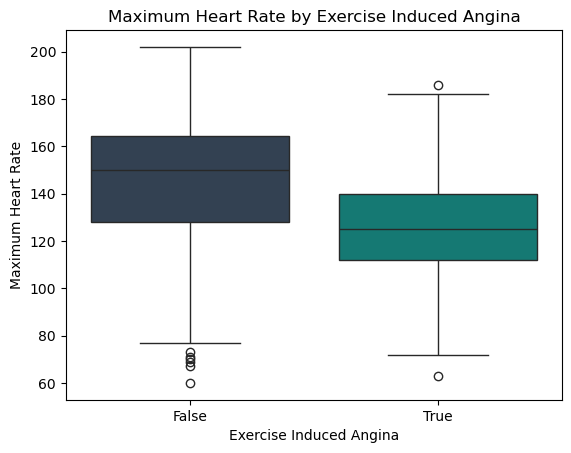

In [ ]:
sns.boxplot(data=df, x='exang', y='thalch', palette=PLOT_COLORS['categorical'][:2])
plt.title('Maximum Heart Rate by Exercise Induced Angina')
plt.xlabel(COLUMN_LABELS['exang'])
plt.ylabel(COLUMN_LABELS['thalch'])
plt.show()

## 12. Exploring Thalassemia Type

Thal counts: thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
Number of unique thal values: 3


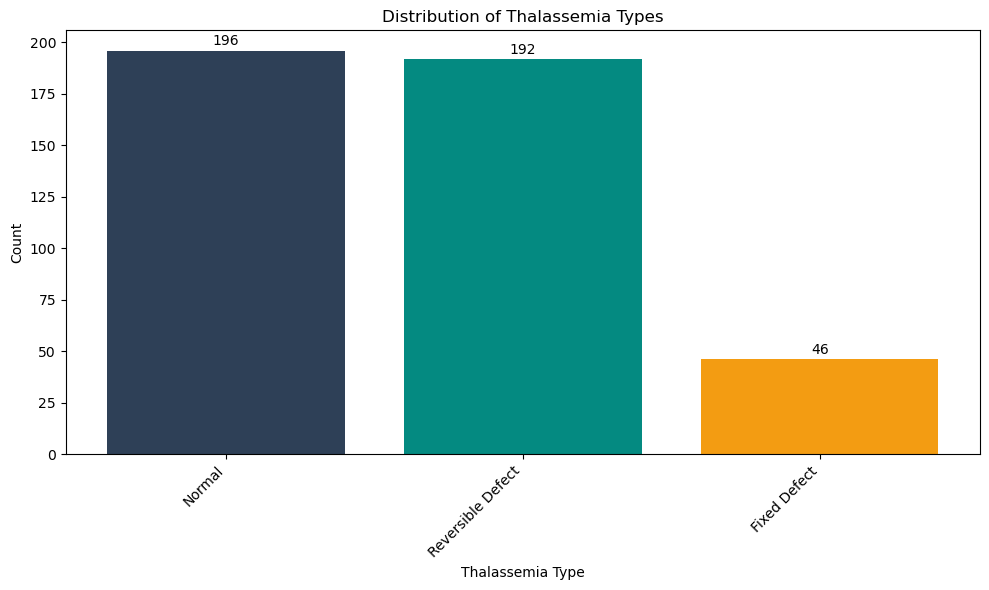

Thalassemia Analysis:
- Normal: Indicates normal blood flow
- Fixed Defect: Permanent reduction in blood flow
- Reversible Defect: Temporary reduction in blood flow


In [ ]:
# Thalassemia analysis
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Count plot with descriptive labels and proper colors
thal_counts = df['thal'].value_counts()
print("Thal counts:", thal_counts)
print("Number of unique thal values:", len(thal_counts))

# Create proper labels based on the actual string values in the data
thal_label_mapping = {
    'normal': 'Normal',
    'fixed defect': 'Fixed Defect',
    'reversable defect': 'Reversible Defect'
}

# Get the actual labels for the values present in the data
actual_labels = [thal_label_mapping.get(val, val.title()) for val in thal_counts.index]

bars = ax.bar(range(len(thal_counts)), thal_counts.values, color=PLOT_COLORS['categorical'][:len(thal_counts)])

ax.set_xlabel('Thalassemia Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Thalassemia Types')
ax.set_xticks(range(len(thal_counts)))
ax.set_xticklabels(actual_labels, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Thalassemia Analysis:")
print("- Normal: Indicates normal blood flow")
print("- Fixed Defect: Permanent reduction in blood flow")
print("- Reversible Defect: Temporary reduction in blood flow")

## 13. Exploring the Target Column (Heart Disease Level)

In [ ]:
print("Value counts for num (heart disease presence):")
print(df['num'].value_counts(), "\n")

# Convert heart disease numbers to descriptive names
heart_disease_labels = {0: 'No Disease', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Critical'}

print("Heart Disease Distribution with Descriptive Labels:")
print("=" * 50)
for level in sorted(df['num'].unique()):
    count = (df['num'] == level).sum()
    percentage = (count / len(df)) * 100
    print(f"{level}: {heart_disease_labels[level]:<12} - {count:>3} patients ({percentage:>5.1f}%)")

print("=" * 50)
print(f"Total patients: {len(df)}")

# Create a summary table
import pandas as pd
heart_disease_summary = pd.DataFrame({
    'Level': sorted(df['num'].unique()),
    'Description': [heart_disease_labels[i] for i in sorted(df['num'].unique())],
    'Count': [((df['num'] == i).sum()) for i in sorted(df['num'].unique())],
    'Percentage': [(((df['num'] == i).sum()) / len(df) * 100) for i in sorted(df['num'].unique())]
})

print("\nSummary Table:")
print(heart_disease_summary.to_string(index=False, float_format='%.1f'))

Value counts for num (heart disease presence):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64 

Heart Disease Distribution with Descriptive Labels:
0: No Disease   - 411 patients ( 44.7%)
1: Mild         - 265 patients ( 28.8%)
2: Moderate     - 109 patients ( 11.8%)
3: Severe       - 107 patients ( 11.6%)
4: Critical     -  28 patients (  3.0%)
Total patients: 920

Summary Table:
 Level Description  Count  Percentage
     0  No Disease    411        44.7
     1        Mild    265        28.8
     2    Moderate    109        11.8
     3      Severe    107        11.6
     4    Critical     28         3.0


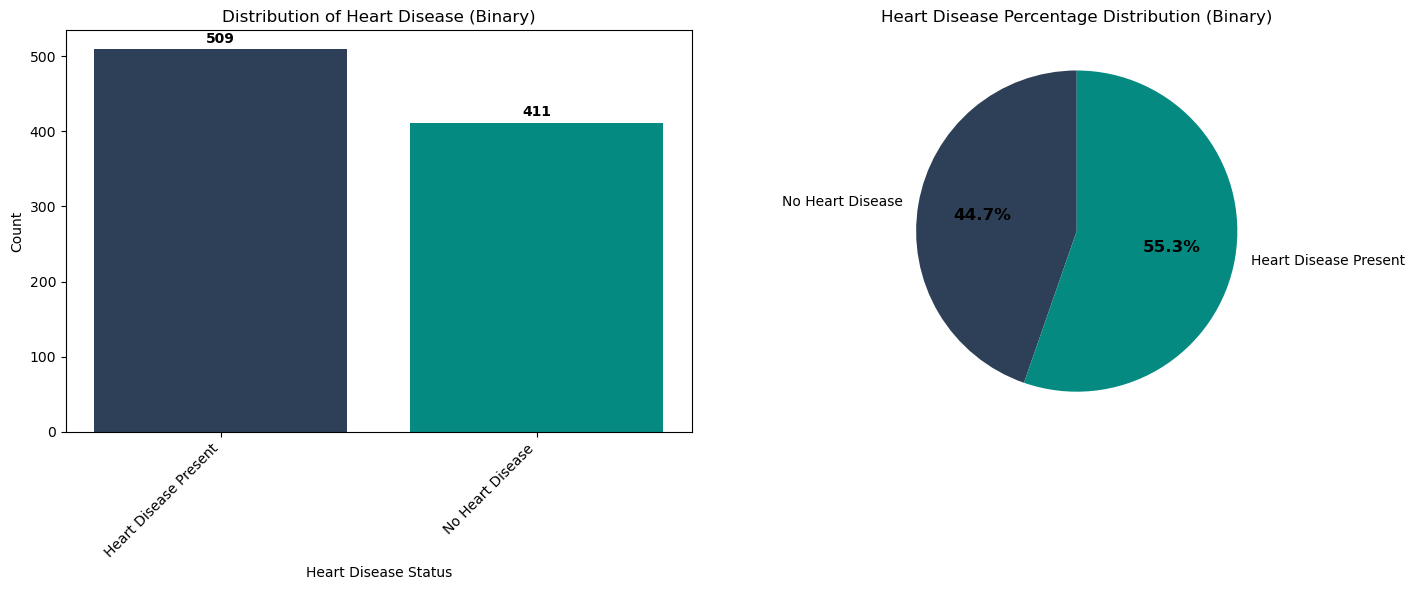

Binary Classification Dataset Summary:
- No Heart Disease (0): 411 patients (44.7%)
- Heart Disease Present (1-4): 509 patients (55.3%)
- Total patients: 920

Original multi-class distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [ ]:
# Heart Disease Analysis - Binary Classification (0 vs 1-4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create binary target column (0 = no disease, 1 = disease present)
# Convert multi-class (0,1,2,3,4) to binary (0,1)
df['target'] = df['num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Count plot for Heart Disease Distribution
heart_disease_counts = df['target'].value_counts()
heart_disease_labels = {0: 'No Heart Disease', 1: 'Heart Disease Present'}

# Bar plot with consistent binary colors
bars1 = ax1.bar(range(len(heart_disease_counts)), heart_disease_counts.values,
                color=PLOT_COLORS['binary'][:len(heart_disease_counts)])
ax1.set_xlabel('Heart Disease Status')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Heart Disease (Binary)')
ax1.set_xticks(range(len(heart_disease_counts)))
ax1.set_xticklabels([heart_disease_labels[i] for i in heart_disease_counts.index], rotation=45, ha='right')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Percentage breakdown
total = len(df)
no_disease_pct = (heart_disease_counts[0] / total) * 100
disease_pct = (heart_disease_counts[1] / total) * 100

# Pie chart with consistent binary colors
labels = ['No Heart Disease', 'Heart Disease Present']
sizes = [heart_disease_counts[0], heart_disease_counts[1]]
colors_pie = PLOT_COLORS['binary']

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax2.set_title('Heart Disease Percentage Distribution (Binary)')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

print(f"Binary Classification Dataset Summary:")
print(f"- No Heart Disease (0): {heart_disease_counts[0]} patients ({no_disease_pct:.1f}%)")
print(f"- Heart Disease Present (1-4): {heart_disease_counts[1]} patients ({disease_pct:.1f}%)")
print(f"- Total patients: {total}")

print(f"\nOriginal multi-class distribution:")
print(df['num'].value_counts().sort_index())

The target column is `num`, which is the predicted attribute. We will use this column to predict heart disease.
The unique values in this column are: [0, 1, 2, 3, 4], which represent 5 types of heart disease severity levels:
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease`
* `3 = severe heart disease`
* `4 = critical heart disease`

# Handling Missing Values

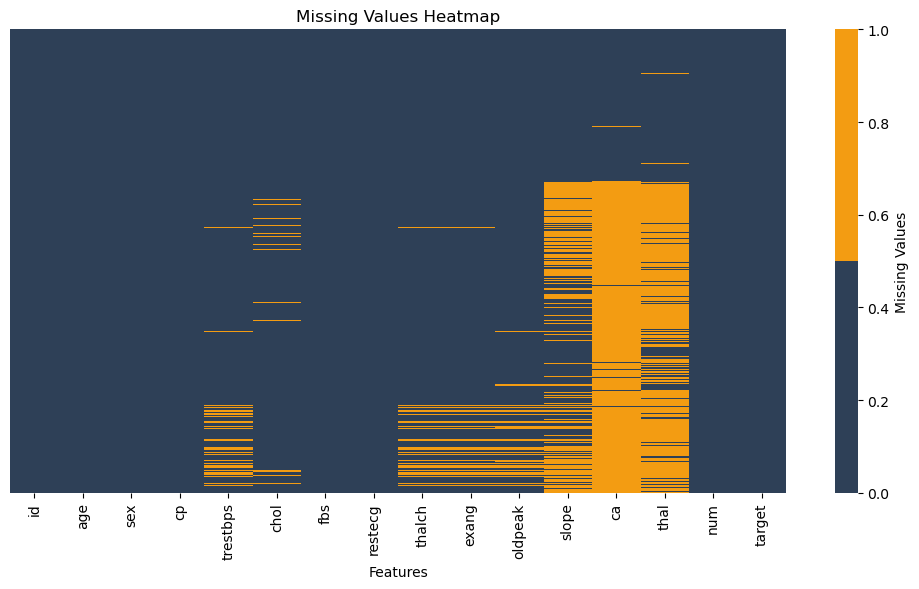

In [ ]:
# Missing values heatmap with consistent styling
plt.figure(figsize=(10, 6))
missing_data = df.isnull()
sns.heatmap(missing_data, cbar=True, yticklabels=False,
            cmap=[PLOT_COLORS['primary'], PLOT_COLORS['accent']],
            cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = ['slope', 'exang', 'restecg','fbs','thal', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch','ca', 'chol', 'trestbps', 'age']

In [ ]:
#impute missing values for numeric columns
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [ ]:
#impute missing values of categorical columns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

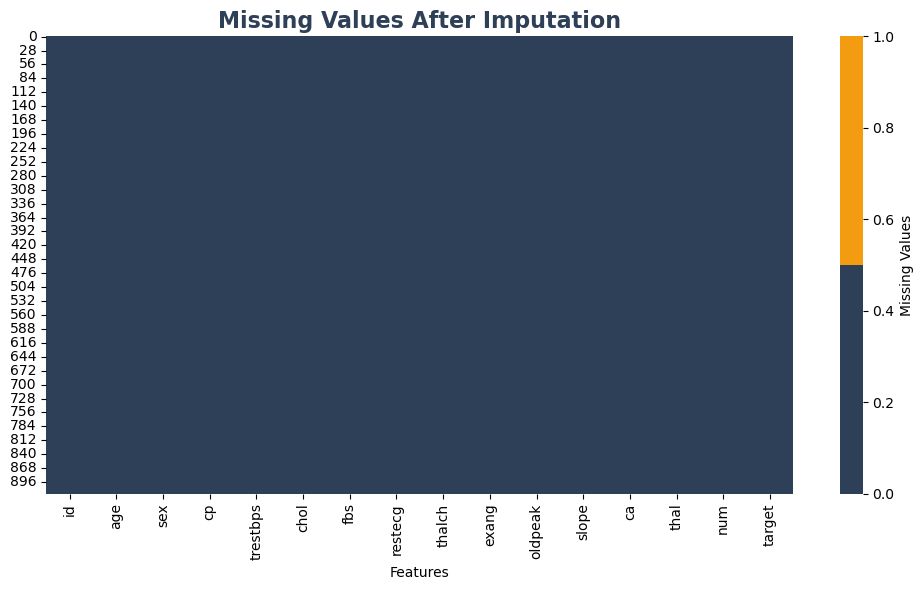

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),
            vmin=0, vmax=1,
            cmap=[PLOT_COLORS['primary'], PLOT_COLORS['accent']],
            cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values After Imputation',
          fontsize=16, fontweight='bold', color=PLOT_COLORS['primary'])
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# 📊 Feature Correlation Analysis

Understanding how different features relate to each other and to heart disease is crucial for:

- **Feature Selection**: Identifying the most predictive variables
- **Multicollinearity Detection**: Finding highly correlated features that might cause issues in modeling
- **Clinical Insights**: Understanding which patient characteristics are most strongly associated with heart disease
- **Data Validation**: Ensuring correlations align with medical knowledge

The correlation heatmap below shows relationships between all numeric features with human-readable labels for better interpretation.

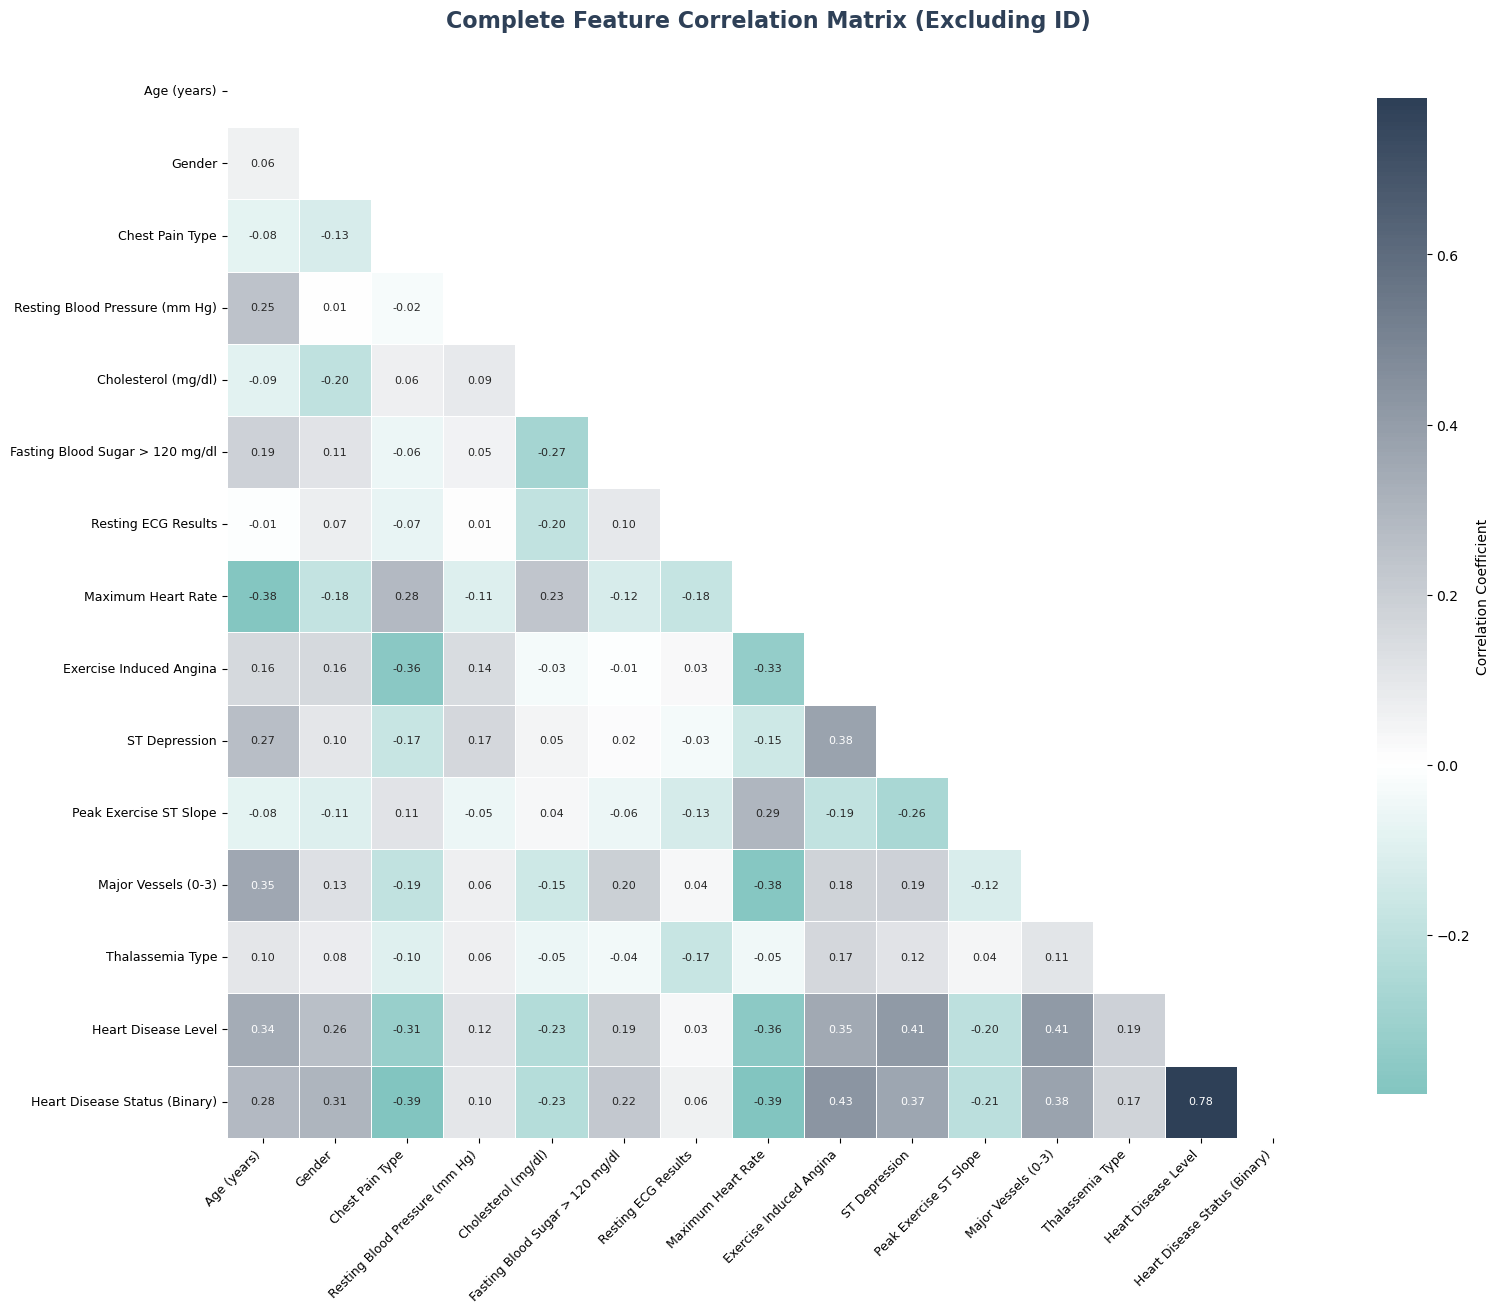

🔍 COMPREHENSIVE CORRELATION INSIGHTS:
📈 Strongest correlations with Heart Disease (target):
--------------------------------------------------
 1. Heart Disease Level             ↗️ Positive ( 0.783)
 2. Exercise Induced Angina         ↗️ Positive ( 0.434)
 3. Maximum Heart Rate              ↘️ Negative (-0.388)
 4. Chest Pain Type                 ↘️ Negative (-0.385)
 5. Major Vessels (0-3)             ↗️ Positive ( 0.377)
 6. ST Depression                   ↗️ Positive ( 0.366)
 7. Gender                          ↗️ Positive ( 0.307)

🔗 Strongest inter-feature correlations:
--------------------------------------------------
 1. ST Depression        ↔ Heart Disease Level  ↗️ Positive ( 0.414)
 2. Major Vessels (0-3)  ↔ Heart Disease Level  ↗️ Positive ( 0.410)
 3. Age (years)          ↔ Maximum Heart Rate   ↘️ Negative (-0.380)
 4. Exercise Induced Angina ↔ ST Depression        ↗️ Positive ( 0.377)
 5. Maximum Heart Rate   ↔ Major Vessels (0-3)  ↘️ Negative (-0.375)

💡 Clinical Interp

In [ ]:
# 📊 Correlation Analysis with Human-Readable Labels
# Create a comprehensive correlation heatmap showing relationships between all features (excluding ID)

# Create a copy of the dataframe for correlation analysis, excluding the ID column
df_corr_analysis = df.drop('id', axis=1).copy()  # Remove ID column as it's not meaningful for correlation

# Handle categorical columns for correlation analysis
# Identify categorical columns that need encoding
categorical_columns_for_corr = df_corr_analysis.select_dtypes(include=['object', 'bool']).columns

# Apply label encoding for correlation analysis
df_corr_encoded = df_corr_analysis.copy()
for col in categorical_columns_for_corr:
    if df_corr_encoded[col].dtype == 'object':
        # For string categorical columns, use label encoding
        le = LabelEncoder()
        df_corr_encoded[col] = le.fit_transform(df_corr_encoded[col].astype(str))
    elif df_corr_encoded[col].dtype == 'bool':
        # For boolean columns, convert to integer
        df_corr_encoded[col] = df_corr_encoded[col].astype(int)

# Now we can safely calculate correlation on the encoded data
correlation_matrix = df_corr_encoded.corr()

# Create human-readable labels for the correlation matrix
readable_labels = []
for col in correlation_matrix.columns:
    if col in COLUMN_LABELS:
        readable_labels.append(COLUMN_LABELS[col])
    else:
        readable_labels.append(col.title())

# Create the correlation heatmap with enhanced styling
plt.figure(figsize=(16, 14))

# Create a custom colormap using our plot colors
from matplotlib.colors import LinearSegmentedColormap
colors = [PLOT_COLORS['secondary'], '#FFFFFF', PLOT_COLORS['primary']]
custom_cmap = LinearSegmentedColormap.from_list('custom_correlation', colors, N=256)

# Create mask for upper triangle to show only lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap=custom_cmap,
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            xticklabels=readable_labels,
            yticklabels=readable_labels,
            linewidths=0.5,
            annot_kws={'size': 8})

plt.title('Complete Feature Correlation Matrix (Excluding ID)',
          fontsize=16, fontweight='bold', color=PLOT_COLORS['primary'], pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Print comprehensive correlation insights
print("🔍 COMPREHENSIVE CORRELATION INSIGHTS:")
print("=" * 70)

# Find strongest positive and negative correlations with target
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print(f"📈 Strongest correlations with Heart Disease (target):")
print("-" * 50)

for i, (feature, corr_val) in enumerate(target_corr.head(8).items()):
    if feature != 'target':  # Skip self-correlation
        original_corr = correlation_matrix['target'][feature]
        direction = "↗️ Positive" if original_corr > 0 else "↘️ Negative"
        feature_label = COLUMN_LABELS.get(feature, feature.title())
        print(f"{i:2d}. {feature_label:<30} {direction:>12} ({original_corr:>6.3f})")

# Find strongest inter-feature correlations (excluding target)
print(f"\n🔗 Strongest inter-feature correlations:")
print("-" * 50)
feature_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        if col1 != 'target' and col2 != 'target':  # Exclude target column
            corr_val = correlation_matrix.iloc[i, j]
            feature_corrs.append((col1, col2, abs(corr_val), corr_val))

# Sort by absolute correlation value
feature_corrs.sort(key=lambda x: x[2], reverse=True)

# Display top 5 inter-feature correlations
for i, (feat1, feat2, abs_corr, corr) in enumerate(feature_corrs[:5]):
    direction = "↗️ Positive" if corr > 0 else "↘️ Negative"
    feat1_label = COLUMN_LABELS.get(feat1, feat1.title())
    feat2_label = COLUMN_LABELS.get(feat2, feat2.title())
    print(f"{i+1:2d}. {feat1_label:<20} ↔ {feat2_label:<20} {direction} ({corr:>6.3f})")

print(f"\n💡 Clinical Interpretation:")
print("-" * 50)
print("• Positive correlations: Features increase together")
print("• Negative correlations: One increases as other decreases")
print("• Values closer to ±1.0 indicate stronger relationships")
print("• ID column excluded as it has no clinical relevance")
print(f"• Total features analyzed: {len(correlation_matrix.columns)}")
print("• Categorical variables temporarily encoded for correlation analysis")
print("=" * 70)

### Now there are 0 missing values in our dataset.

# Outliers

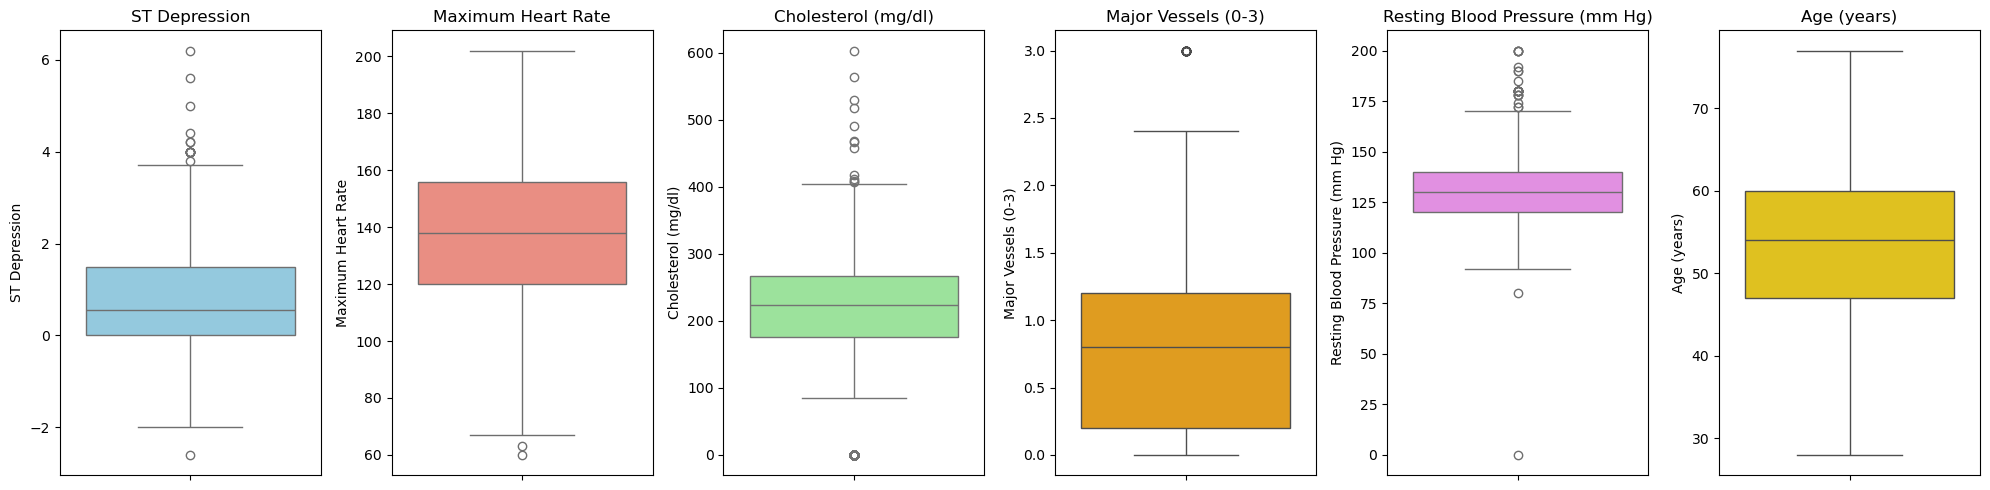

In [ ]:
numeric_cols = ['oldpeak', 'thalch', 'chol','ca', 'trestbps', 'age']
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 5))

colors = ["skyblue", "salmon", "lightgreen", "orange", "violet", "gold"]  # extend as needed


for i, col in enumerate(numeric_cols):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y=df[col], color=colors[i])
    plt.title(COLUMN_LABELS[col])
    plt.ylabel(COLUMN_LABELS[col])
plt.tight_layout() # Add tight_layout for better spacing
plt.show()

In [ ]:
median_trestbps = df['trestbps'].median()
df['trestbps'] = df['trestbps'].replace(0, median_trestbps)

median_chol = df['chol'].median()
df['chol'] = df['chol'].replace(0, median_chol)